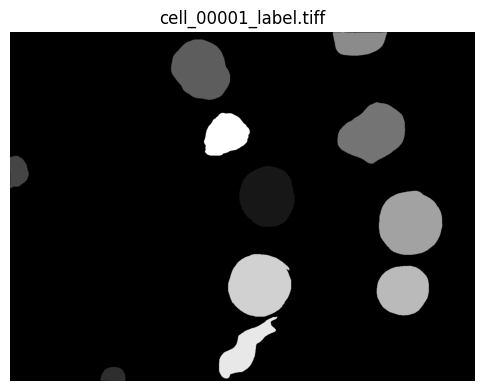

In [5]:
import matplotlib.pyplot as plt
import tifffile as tiff

# Path to your image
path = "/Users/osama/Desktop/New Thesis Benchmarking Study/data/train/labels/cell_00001_label.tiff"

# Load image
img = tiff.imread(path)

# Display
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')  # 'gray' for masks or single-channel
plt.axis('off')
plt.title("cell_00001_label.tiff")
plt.show()


/var/folders/rd/x1fw_c4j4l531p6thn73zfsh0000gn/T/ipykernel_20571/2159013253.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  label = imageio.imread("/Users/osama/Desktop/New Thesis Benchmarking Study/data/train-preprocessed/labels/cell_00001_label.png")


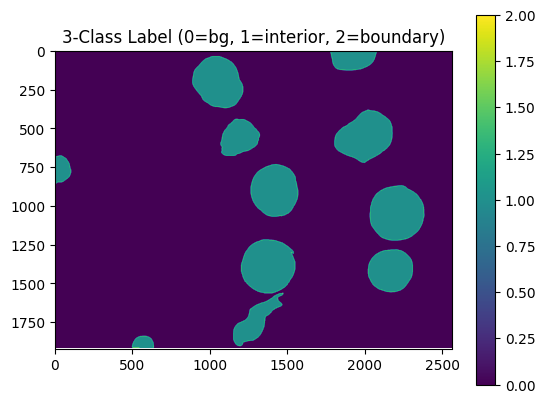

In [4]:
import matplotlib.pyplot as plt
import imageio

label = imageio.imread("/Users/osama/Desktop/New Thesis Benchmarking Study/data/train-preprocessed/labels/cell_00001_label.png")
plt.imshow(label, cmap='viridis')  # or use 'tab10', 'nipy_spectral'
plt.colorbar()
plt.title("3-Class Label (0=bg, 1=interior, 2=boundary)")
plt.show()


In [6]:
import numpy as np
import imageio
unique, counts = np.unique(label, return_counts=True)

for u, c in zip(unique, counts):
    print(f"Class {u}: {c} pixels")


Class 0: 4264287 pixels
Class 1: 624602 pixels
Class 2: 26311 pixels


Label shape: (1920, 2560)
Unique values: [0 1 2]


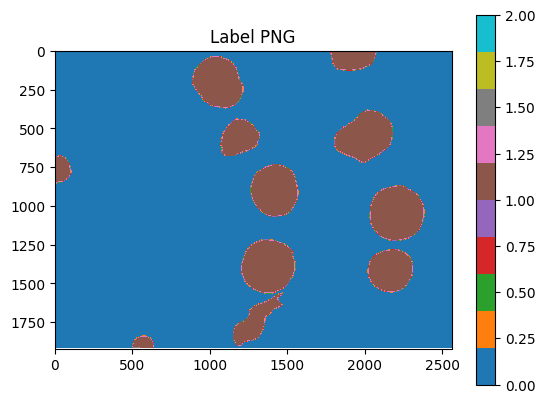

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Replace this with a sample label path
label_path = "./data/train-preprocessed/labels/cell_00001_label.png"

label_img = Image.open(label_path)
label_array = np.array(label_img)

print("Label shape:", label_array.shape)
print("Unique values:", np.unique(label_array))

# Visual inspection
plt.imshow(label_array, cmap="tab10")
plt.title("Label PNG")
plt.colorbar()
plt.show()


Shape: (256, 256)


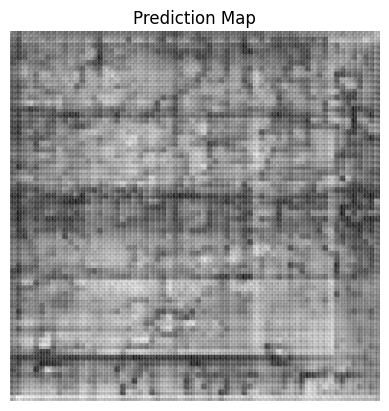

In [4]:
import matplotlib.pyplot as plt
import tifffile as tiff
import numpy as np

# Load the TIFF
path = '/Users/osama/Desktop/New Thesis Benchmarking Study/baseline/work_dir/sac_3class/predictions/epoch_6_prob_map.tiff'
prob_map = tiff.imread(path)

print("Shape:", prob_map.shape)  # e.g. (C, H, W) or (H, W) depending on how saved

# If 3-channel probability map, visualize each class
if prob_map.ndim == 3 and prob_map.shape[0] == 3:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(3):
        axes[i].imshow(prob_map[i], cmap='viridis')
        axes[i].set_title(f"Class {i} probability")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
else:
    # If it's a single-channel image
    plt.imshow(prob_map, cmap='gray')
    plt.title("Prediction Map")
    plt.axis('off')
    plt.show()


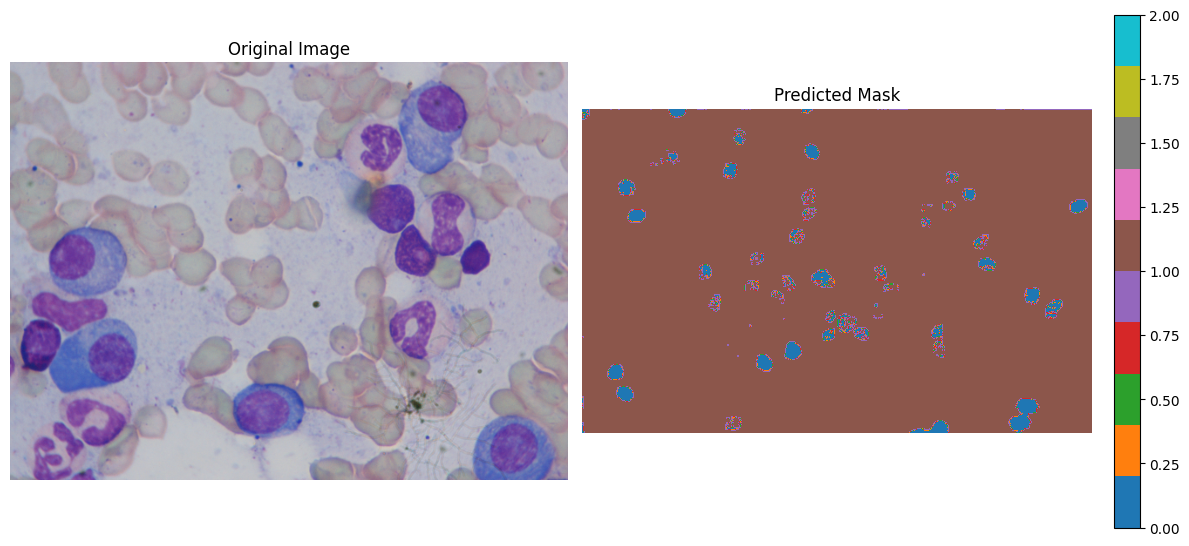

In [7]:
import matplotlib.pyplot as plt
import tifffile as tiff
from PIL import Image
import numpy as np

# Paths
pred_path = '/Users/osama/Desktop/New Thesis Benchmarking Study/baseline/work_dir/sac_3class/predictions/t000_pred.tif'
img_path = '/Users/osama/Desktop/New Thesis Benchmarking Study/data/test/images/cell_00001.tiff'  # or .tiff/.png

# Load image and prediction
image = tiff.imread(img_path)  # or Image.open(img_path) if RGB
pred_mask = tiff.imread(pred_path)

# Normalize image if it's grayscale
if len(image.shape) == 2:  # grayscale
    image_rgb = np.stack([image] * 3, axis=-1)
else:
    image_rgb = image

# Plot both
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb, cmap='gray' if image_rgb.shape[-1] == 1 else None)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pred_mask, cmap='tab10', vmin=0, vmax=2)
plt.title("Predicted Mask")
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

